# **This NB is dedicated to analyze twitter data**

In [1]:
import pandas as pd
import twint
import nest_asyncio
nest_asyncio.apply()

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

# Search using .Near = 'Santiago, Chile' for seven days.

In [14]:
seven_days = pd.read_csv('data/seven_days_tweets.csv')
seven_days = seven_days[['id', 'date', 'username', 'tweet']]

In [17]:
seven_days[['date', 'tweet']].groupby(['date']).count()

,tweet
date,
2021-01-03,2238
2021-01-04,11754
2021-01-05,11128
2021-01-06,13595
2021-01-07,12717
2021-01-08,11106
2021-01-09,10028
2021-01-10,9046


# **Search: .Near = 'Santiago, Chile' and dates from 'estallido'**

In [3]:
estallido = pd.read_csv('data/santiago_estallido.csv')
estallido[['id', 'date', 'tweet']].groupby('date').count()

,id,tweet
date,,
2019-10-14,1513,1513
2019-10-15,8444,8444
2019-10-16,8756,8756
2019-10-17,9657,9657
2019-10-18,12015,12015


In [4]:
# Se filtran los datos
estallido = estallido[['id', 'date', 'tweet']][estallido['date'] == '2019-10-18']
estallido.sample(5)

,id,date,tweet
9201,1185186571965927430,2019-10-18,Los paneles de expertos https://t.co/SXkSmNoBrU
4886,1185288111426805761,2019-10-18,Es estupidez
3826,1185304109349515266,2019-10-18,@ahyamenosmal Que pena ver tanto paco que abus...
11302,1185120100426407936,2019-10-18,06:06 en Santiago Llamado a fuego en pastizale...
3797,1185304279474692098,2019-10-18,La estrategia del tío metro @metrodesantiago.....


In [5]:

# spanish stop words
stop_words = set(stopwords.words('spanish'))
# join tweets by ' '
estallido_str = ' '.join([x for x in estallido['tweet']])
# split the resultatn text
estallido_list = estallido_str.split()
# lowercase
estallido_list = [w.lower() for w in estallido_list]
# delete @account, stop words and 'https...'   
estallido_list = [w for w in estallido_list if not w in stop_words and not w in ['t', 'si', 'q']]
final_data = []
for w in estallido_list:
    if not (len(w)>=5 and w[:5] == 'https') :
        final_data.append(w)

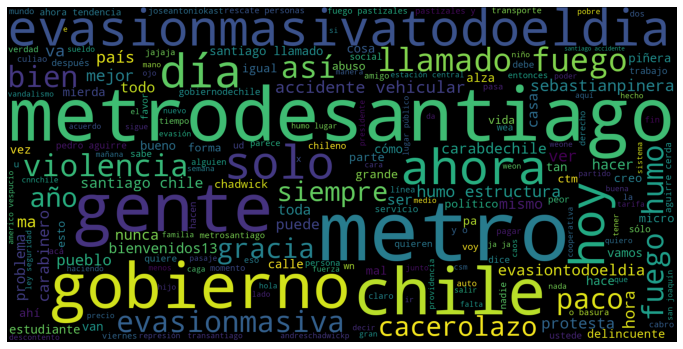

<Figure size 432x288 with 0 Axes>

In [6]:
# final data
final_data = ' '.join(final_data)
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color="black").generate(final_data)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.savefig('imgs/wordcloud_estallido.png')